In [ ]:
from fastai.vision.all import *

/home/tiago/anaconda3/envs/fastai/lib/python3.9/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /opt/conda/conda-bld/pytorch_1607370151529/work/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [ ]:
from timm import models

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import wandb

api = wandb.Api()

sweep_id = "czxa4tzd"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
best_run_config = sweep.best_run().config

wandb: Sorting runs by -summary_metrics.f1_score


In [ ]:
from my_utils import dotdict

In [ ]:
config = dotdict(best_run_config)
config.inference = True

### Model sizes

In [ ]:
def get_param_number(learner):
    return sum(p.numel() for p in learner.model.parameters())

In [ ]:
from wandb_sweep import get_dls, get_learner

In [ ]:
dls, image_size, n_channels = get_dls(config)

In [ ]:
config.architecture = 'resnet18'

In [ ]:
learner = get_learner(config, dls, n_channels)

In [ ]:
models = ['resnet18', 'resnet26', 'resnet34', 'resnet50', 'resnet101', 'convnext_nano', 'convnext_tiny', 'convnext_small']

In [ ]:
n_params = []
for model in models:
    config.architecture = model
    learner = get_learner(config, dls, n_channels)
    n_params.append(get_param_number(learner))
n_params = np.array(n_params)

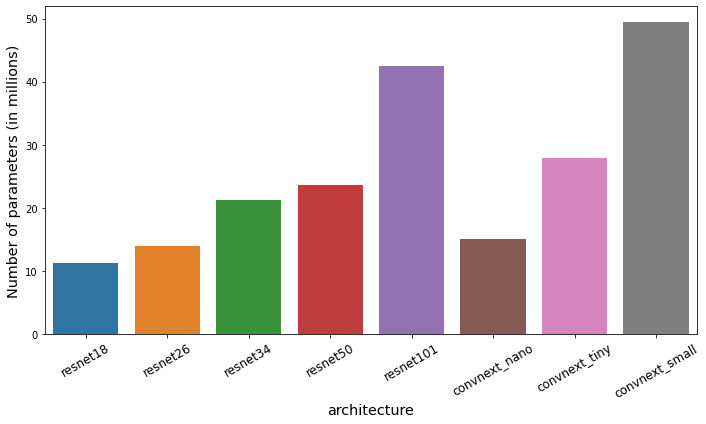

In [ ]:
fig = plt.figure(figsize=(10, 6))

sns.barplot(models, n_params/10**6)
plt.xlabel('architecture', fontsize='x-large')
plt.ylabel('Number of parameters (in millions)', fontsize='x-large')
plt.tick_params(axis='x', rotation=30)
plt.xticks(fontsize='large');

fig.tight_layout()
fig.savefig('../figs/glitches/10_transfer_model_sizes.pdf', dpi=600)

In [ ]:
n_params/1e6

array([11.187798, 13.991254, 21.295958, 23.55311 , 42.545238, 14.966662,
       27.837046, 49.471606])